In [21]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd=r"C:\Users\aasth\Downloads\tesseract.exe"


In [22]:
# pytesseract.pytesseract.tesseract_cmd=r'tesseract-ocr-setup-4.00.00dev.exe'

In [23]:
# import sys

# sys.path.append(r"C:\Users\aasth\Downloads\tesseract-ocr-w64-setup-5.3.0.20221222.exe")

In [24]:
import cv2

In [25]:
img = cv2.imread('2.png')

In [26]:
img = cv2.imread('2.png')
cv2.imshow('first image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [27]:
##gaussain blur
op_gauss = cv2.GaussianBlur(img,(1,1),6)

In [28]:
output_med = cv2.medianBlur(img,1)

In [29]:
output_bil = cv2.bilateralFilter(op_gauss,5,1,1)

In [30]:
# cv2.imshow('first image',output_bil)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [31]:
text = pytesseract.image_to_string(output_bil)
print(text)

In [32]:
text

''

In [33]:
output_box = cv2.boxFilter(img,-100,(1,1))

In [34]:
# cv2.imshow('first image',output_box)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [35]:
output_bil = cv2.bilateralFilter(output_box,5,1,1)

In [36]:
cv2.imshow('first image',output_bil)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [37]:
text = pytesseract.image_to_string(output_bil)
print(text)

In [38]:
output_med = cv2.medianBlur(img,1)

In [39]:
## image sharpening
gaussian_blur = cv2.GaussianBlur(img,(7,7),2)
sharpened = cv2.addWeighted(img,1.5,output_med,-0.5,0)

In [40]:
cv2.imshow('first image',sharpened)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [41]:
text = pytesseract.image_to_string(sharpened)
print(text)

## Text segmentation

In [42]:
import matplotlib.pyplot as plt
import numpy as np

In [43]:
img = cv2.imread('2.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [44]:
cv2.imshow('first image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

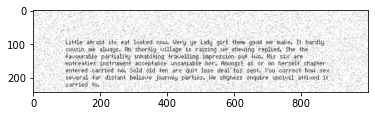

In [45]:
h, w, c = img.shape

if w > 1000:
    
    new_w = 1000
    ar = w/h
    new_h = int(new_w/ar)
    
    img = cv2.resize(img, (new_w, new_h), interpolation = cv2.INTER_AREA)
plt.imshow(img);

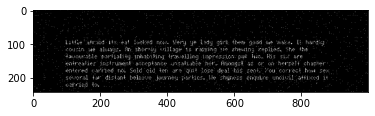

In [46]:
def thresholding(image):
    img_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(img_gray,80,255,cv2.THRESH_BINARY_INV)
    plt.imshow(thresh, cmap='gray')
    return thresh

thresh_img = thresholding(img);

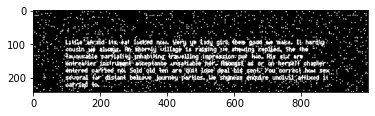

In [47]:
kernel = np.ones((3,3), np.uint8)
dilated = cv2.dilate(thresh_img, kernel, iterations = 1)
plt.imshow(dilated, cmap='gray');

In [48]:
(contours, heirarchy) = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
sorted_contours_lines = sorted(contours, key = lambda ctr : cv2.boundingRect(ctr)[1]) # (x, y, w, h)

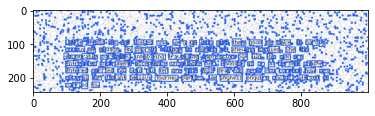

In [49]:
img2 = img.copy()

for ctr in sorted_contours_lines:
    
    x,y,w,h = cv2.boundingRect(ctr)
    cv2.rectangle(img2, (x,y), (x+w, y+h), (40, 100, 250), 2)
    
plt.imshow(img2);

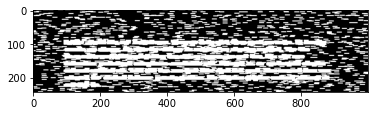

In [50]:
#dilation
kernel = np.ones((3,15), np.uint8)
dilated2 = cv2.dilate(thresh_img, kernel, iterations = 1)
plt.imshow(dilated2, cmap='gray');

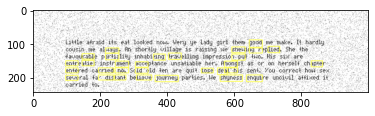

In [51]:
img3 = img.copy()
words_list = []

for line in sorted_contours_lines:
    
    # roi of each line
    x, y, w, h = cv2.boundingRect(line)
    roi_line = dilated2[y:y+w, x:x+w]
    
    # draw contours on each word
    (cnt, heirarchy) = cv2.findContours(roi_line.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    sorted_contour_words = sorted(cnt, key=lambda cntr : cv2.boundingRect(cntr)[0])
    
    for word in sorted_contour_words:
        
        if cv2.contourArea(word) < 400:
            continue
        
        x2, y2, w2, h2 = cv2.boundingRect(word)
        words_list.append([x+x2, y+y2, x+x2+w2, y+y2+h2])
        cv2.rectangle(img3, (x+x2, y+y2), (x+x2+w2, y+y2+h2), (255,255,100),2)
        
plt.imshow(img3);

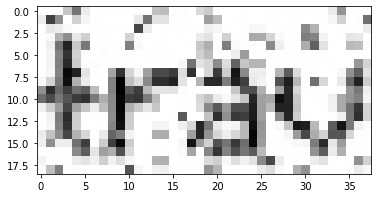

In [52]:
ninth_word = words_list[7]
roi_9 = img[ninth_word[1]:ninth_word[3], ninth_word[0]:ninth_word[2]]
plt.imshow(roi_9);

## Noise Removal

In [53]:
img = cv2.imread('2.png')

In [54]:
averaging = cv2.blur(img,(10,10))

In [55]:
cv2.imshow('first image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [56]:
output_gauss = cv2.GaussianBlur(img,(5,5),6)

In [57]:
output_gauss = cv2.GaussianBlur(output_gauss,(5,5),6)

In [58]:
output_gauss = cv2.GaussianBlur(output_gauss,(5,5),6)

In [59]:
output_gauss = cv2.GaussianBlur(output_gauss,(5,5),6)

In [60]:
output_gauss = cv2.GaussianBlur(output_gauss,(5,5),6)

In [61]:
output_gauss = cv2.GaussianBlur(output_gauss,(5,5),6)

In [62]:
cv2.imshow('first image',output_gauss)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [63]:
# gaussian_blur = cv2.GaussianBlur(img,(7,7),2)
sharpened = cv2.addWeighted(img,1.5,output_gauss,-0.5,0)

In [64]:
cv2.imshow('first image',sharpened)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [65]:
text = pytesseract.image_to_string(sharpened)
print(text)

In [66]:
text

''

In [ ]:
# count = 0
# while text=='':
#     output_gauss = cv2.GaussianBlur(output_gauss,(5,5),6)
#     sharpened = cv2.addWeighted(img,1.5,output_gauss,-0.5,0)
#     text = pytesseract.image_to_string(sharpened)
#     count+=1
#     print(count)
    
    
    

In [ ]:
text

In [69]:
count=0
output_gauss = cv2.GaussianBlur(img,(5,5),6)

for i in range(25):
    output_gauss = cv2.GaussianBlur(output_gauss,(5,5),6)
    sharpened = cv2.addWeighted(img,1.5,output_gauss,-0.5,0)
    text = pytesseract.image_to_string(sharpened)
    count+=1
    print(count)
    print(text)
    print('-------------')
    

1

-------------
2

-------------
3

-------------
4

-------------
5

-------------
6

-------------
7

-------------
8

-------------
9

-------------
10

-------------
11

-------------
12

-------------
13

-------------
14

-------------
15

-------------
16

-------------
17

-------------
18

-------------
19

-------------
20

-------------
21

-------------
22

-------------
23

-------------
24

-------------
25

-------------


In [70]:
text

''

In [71]:
# gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# gray_filtered = cv2.inRange(gray_image, 0, 75)
# cv2.imwrite("cleaned.png", gray_filtered)

In [72]:
def get_text(img_name):
    lower = (100, 100, 100)
    upper = (104, 104, 104) 
    img = cv2.imread(img_name)
    img_rgb_inrange = cv2.inRange(img, lower, upper)
    neg_rgb_image = ~img_rgb_inrange
    cv2.imwrite('neg_img_rgb_inrange.png', neg_rgb_image)
    data = pytesseract.image_to_string(neg_rgb_image, lang='eng')
    return data

In [73]:
get_text('2.png')

''

In [74]:
# Load image, grayscale, Otsu's threshold
image = cv2.imread('2.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]



In [75]:
# Morph open to remove noise
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)



In [76]:
# Find contours and remove small noise
cnts = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    area = cv2.contourArea(c)
    if area < 50:
        cv2.drawContours(opening, [c], -1, 0, -1)



In [77]:
# Invert and apply slight Gaussian blur
result = 255 - opening
result = cv2.GaussianBlur(result, (3,3), 0)



In [78]:
# Perform OCR
data = pytesseract.image_to_string(result, lang='eng', config='--psm 6')
print(data)



In [ ]:
#cv2.imshow('thresh', thresh)
#cv2.imshow('opening', opening)
cv2.imshow('result', result)
# cv2.waitKey()
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
text = pytesseract.image_to_string(result)
print(text)

In [ ]:
text